In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support

In [2]:
df = pd.read_csv("diabetes_data.csv", sep=';') #reading the data
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
df.isna().sum() #no NA values

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [4]:
df['gender'] = pd.factorize(df['gender'])[0] #converting gender to int values
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Scaling data

In [5]:
data = df.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
ND = pd.DataFrame(data)
ND["class"] = df["class"]
ND.rename(columns={0:'age', 1:'gender', 2:'polyuria', 3:'polydipsia', 4:'sudden_weight_loss', 5:'weakness', 6:'polyphagia', 7:'genital_thrush',8:'visual_blurring',9:'itching',10:'irritability',11:'delayed_healing',12:'partial_paresis', 13:'muscle_stiffness', 14:'alopecia', 15:'obesity',}, inplace=True)
ND.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1
1,0.567568,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,0.337838,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,0.391892,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.594595,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


Creating COD and CND. Cluster results added as a new column called "cluster"

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df.values[:, :-1]) 
COD = df.copy()
COD["cluster"] = kmeans.labels_
kmeans_nd = KMeans(n_clusters=2, random_state=0).fit(ND.values[:, :-1])
CND = ND.copy()
CND["cluster"] = kmeans_nd.labels_
COD.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,cluster
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0


Presenting the clustering results for COD

Text(0, 0.5, 'Delayed Healing')

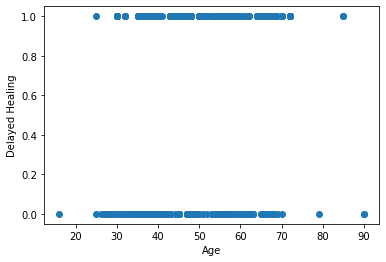

In [7]:
plt.scatter(COD.age,COD.delayed_healing)
plt.xlabel('Age')
plt.ylabel('Delayed Healing')

Text(0.5, 1.0, 'K Means Cluster')

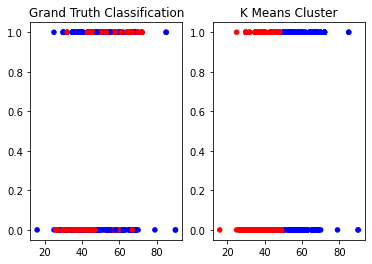

In [8]:
color_theme = np.array(["red", "blue"])
plt.subplot(1,2,1)
plt.scatter(x=COD.age, y=COD.delayed_healing, c=color_theme[COD["class"]], s=20)
plt.title("Grand Truth Classification")
color_theme2 = np.array(["blue", "red"])
plt.subplot(1,2,2)
plt.scatter(x=COD.age, y=COD.delayed_healing, c=color_theme2[COD["cluster"]], s=20)
plt.title("K Means Cluster")

Presenting the clustering results for CND

Text(0, 0.5, 'Delayed Healing')

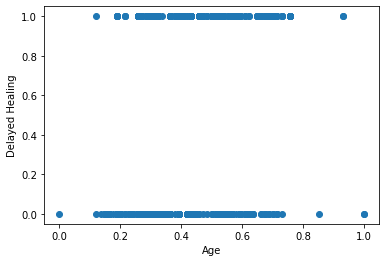

In [9]:
plt.scatter(CND.age,CND.delayed_healing)
plt.xlabel('Age')
plt.ylabel('Delayed Healing')

Text(0.5, 1.0, 'K Means Cluster')

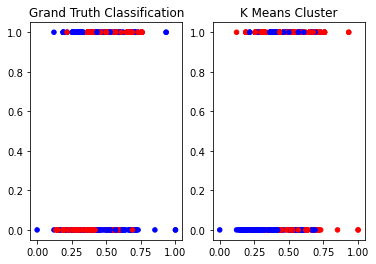

In [10]:
color_theme = np.array(["red", "blue"])
plt.subplot(1,2,1)
plt.scatter(x=CND.age, y=CND.delayed_healing, c=color_theme[CND["class"]], s=20)
plt.title("Grand Truth Classification")
color_theme2 = np.array(["blue", "red"])
plt.subplot(1,2,2)
plt.scatter(x=CND.age, y=CND.delayed_healing, c=color_theme2[CND["cluster"]], s=20)
plt.title("K Means Cluster")

Clustering distributions

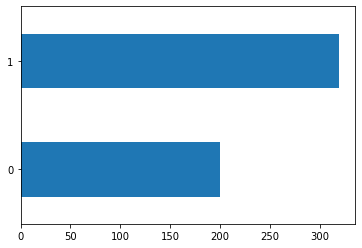

In [11]:
df["class"].value_counts().plot(kind = 'barh' ).invert_yaxis()

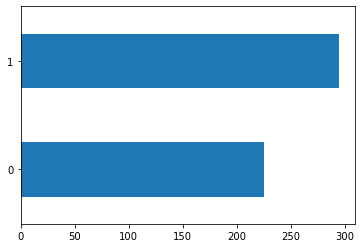

In [12]:
COD["cluster"].value_counts().plot(kind = 'barh' ).invert_yaxis()

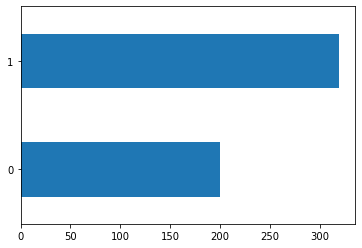

In [13]:
ND["class"].value_counts().plot(kind = 'barh' ).invert_yaxis()

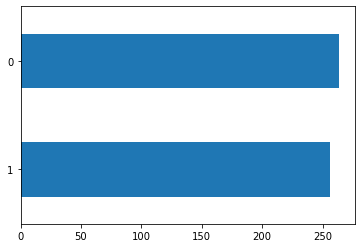

In [14]:
CND["cluster"].value_counts().plot(kind = 'barh' ).invert_yaxis()

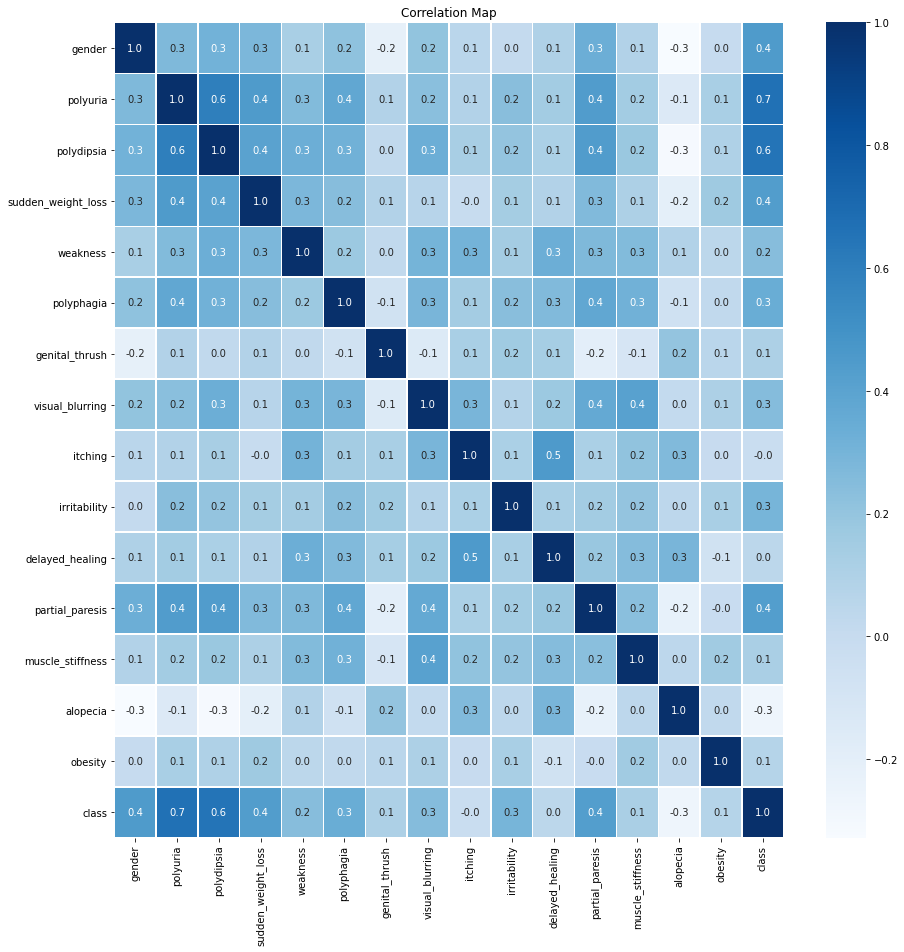

In [15]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(df.iloc[:,1:].corr(),annot= True,linewidths=0.5,fmt = ".1f", ax=ax, cmap="Blues")
plt.title('Correlation Map')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [16]:
# evaluate the model using a given test condition
def evaluate_model(cv, data, name, style):
    # get the dataset
    if(name == "CND" or name == "COD"):
        X, y = data.values[:, :-2], data["cluster"]
    else:
        X, y = data.values[:, :-1], data["class"]

    # get the model
    if(style == "classification"):
        model = RandomForestClassifier(n_estimators = 10, random_state = 30)
    else:
        model = KMeans(n_clusters=2, random_state=0)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    y_pred = cross_val_predict(model, X, y,cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max(), y_pred


def plot_results(data,name,style):
    folds = range(2,11)
    # record mean and min/max of each set of results
    means, mins, maxs = list(),list(),list()
    # evaluate each k value
    for k in folds:
        # define the test condition
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
        # evaluate k value
        k_mean, k_min, k_max, y_pred = evaluate_model(cv,data,name,style)
        # report performance
        print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
        # store mean accuracy
        means.append(k_mean)
        # store min and max relative to the mean
        mins.append(k_mean - k_min)
        maxs.append(k_max - k_mean)
        if(k==6): #6 folds gives better results. Confusion matrix generated from 6 folds. Also other metrics printed for 6 folds
            
            if(name == "CND" or name == "COD"):
                cf_matrix = confusion_matrix(data["cluster"], y_pred)
                print(classification_report(data["cluster"], y_pred, digits=2))
            else:
                cf_matrix = confusion_matrix(data["class"], y_pred)
                print(classification_report(data["class"], y_pred, digits=3))
            ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

            ax.set_title(name +' Confusion Matrix\n');
            ax.set_xlabel('\nPredicted Values')
            ax.set_ylabel('Actual Values ');

            ## Ticket labels - List must be in alphabetical order
            ax.xaxis.set_ticklabels(['False','True'])
            ax.yaxis.set_ticklabels(['False','True'])

            ## Display the visualization of the Confusion Matrix.
            
    plt.show()    
    # line plot of k mean values with min/max error bars
    pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
    # plot the ideal case in a separate color
    pyplot.show()
    

> folds=2, accuracy=0.969 (0.954,0.985)
> folds=3, accuracy=0.967 (0.948,0.988)
> folds=4, accuracy=0.963 (0.931,0.985)
> folds=5, accuracy=0.975 (0.923,1.000)
> folds=6, accuracy=0.981 (0.930,1.000)
              precision    recall  f1-score   support

           0      0.966     0.985     0.975       200
           1      0.991     0.978     0.984       320

    accuracy                          0.981       520
   macro avg      0.978     0.982     0.980       520
weighted avg      0.981     0.981     0.981       520

> folds=7, accuracy=0.979 (0.905,1.000)
> folds=8, accuracy=0.973 (0.908,1.000)
> folds=9, accuracy=0.979 (0.912,1.000)
> folds=10, accuracy=0.977 (0.942,1.000)


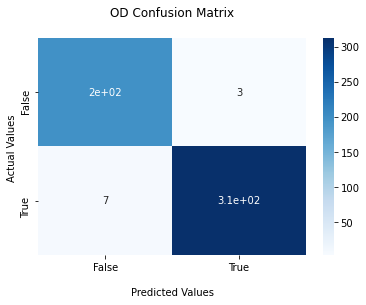

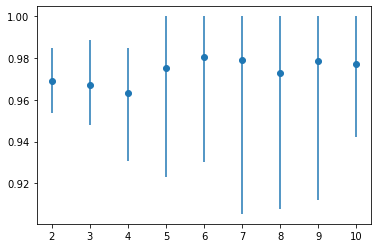

> folds=2, accuracy=0.965 (0.946,0.985)
> folds=3, accuracy=0.965 (0.942,0.988)
> folds=4, accuracy=0.962 (0.923,0.985)
> folds=5, accuracy=0.973 (0.923,0.990)
> folds=6, accuracy=0.979 (0.919,1.000)
              precision    recall  f1-score   support

           0      0.966     0.980     0.973       200
           1      0.987     0.978     0.983       320

    accuracy                          0.979       520
   macro avg      0.976     0.979     0.978       520
weighted avg      0.979     0.979     0.979       520

> folds=7, accuracy=0.979 (0.905,1.000)
> folds=8, accuracy=0.969 (0.892,1.000)
> folds=9, accuracy=0.979 (0.912,1.000)
> folds=10, accuracy=0.977 (0.942,1.000)


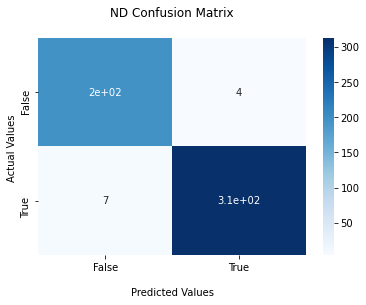

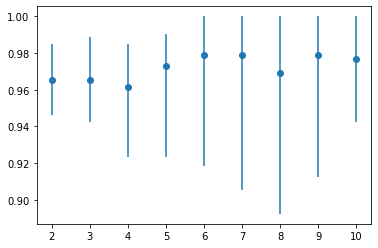

> folds=2, accuracy=1.000 (1.000,1.000)
> folds=3, accuracy=1.000 (1.000,1.000)
> folds=4, accuracy=1.000 (1.000,1.000)
> folds=5, accuracy=1.000 (1.000,1.000)
> folds=6, accuracy=1.000 (1.000,1.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       295

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520

> folds=7, accuracy=1.000 (1.000,1.000)
> folds=8, accuracy=1.000 (1.000,1.000)
> folds=9, accuracy=1.000 (1.000,1.000)
> folds=10, accuracy=1.000 (1.000,1.000)


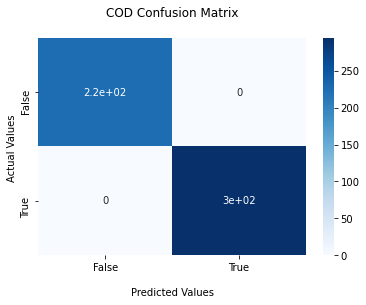

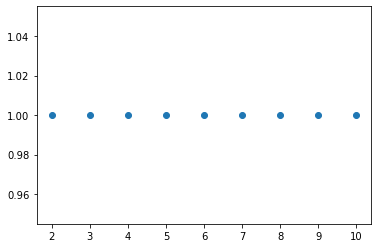

> folds=2, accuracy=0.958 (0.946,0.969)
> folds=3, accuracy=0.965 (0.954,0.977)
> folds=4, accuracy=0.971 (0.962,0.992)
> folds=5, accuracy=0.963 (0.952,0.981)
> folds=6, accuracy=0.969 (0.943,1.000)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       264
           1       0.98      0.96      0.97       256

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520

> folds=7, accuracy=0.962 (0.932,0.986)
> folds=8, accuracy=0.979 (0.954,1.000)
> folds=9, accuracy=0.971 (0.914,1.000)
> folds=10, accuracy=0.977 (0.942,1.000)


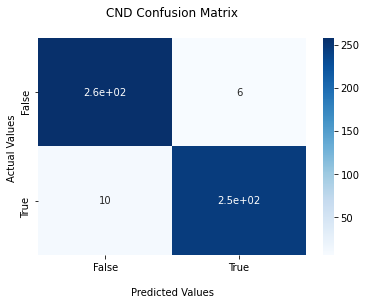

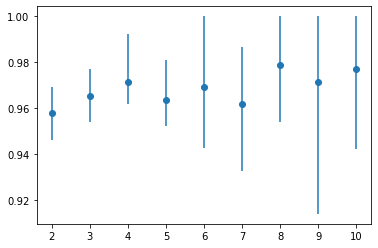

In [17]:
OD = df # df is the orginal data
plot_results(OD,"OD","classification")
plot_results(ND,"ND","classification")
plot_results(COD,"COD","classification")
plot_results(CND,"CND","classification")